## Importing Necessary Modules

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns

Even though the HAM10000 dataset is mostly composed of images, and the objective of this capstone project is to predict the diagnosis of a skin condition based on its image, factors not conveyed in the images (for example, age, sex, or location of the condition) can be important for the decision making process. Some of the information are included in the metadata of the dataset, and to see if any of these factors influence the diagnosis, I decided to analyze differences in their distributions for each diagnosis.

In particular, I was curious if patients with cancerous diagnoses (Melanoma or Basal cell carcinoma) are older than patients with noncancerous diagnoses (Actinic keratoses, Benign keratosis-like lesions, Dermatofibroma, moles, or bruises). To test this hypothesis, I compared the distribution of patient age for the two groups using frequentist hypothesis testing. 


## Loading Dataset

In [2]:
data = pd.read_csv(r'C:\Users\songs\Desktop\CSV files\dataverse_files\HAM10000_metadata.csv')
data.head(10)

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear
5,HAM_0001466,ISIC_0027850,bkl,histo,75.0,male,ear
6,HAM_0002761,ISIC_0029176,bkl,histo,60.0,male,face
7,HAM_0002761,ISIC_0029068,bkl,histo,60.0,male,face
8,HAM_0005132,ISIC_0025837,bkl,histo,70.0,female,back
9,HAM_0005132,ISIC_0025209,bkl,histo,70.0,female,back


First, I split the data into cancerous and non-cancerous datasets using the diagnosis column. Using the shape method on both tables, we can see that there are 1637 cancerous cases and 8388 non-cancerous cases. 

There are three requirements that must be met for frequentist hypothesis testing: First, the samples must be independent. As none of the samples are related to each other and the sample size is less than 10% of the total population, this condition is satisfied. Second, the samples must be random. This is an assumption, but since the description of the dataset doesn’t mention any biases in selection we can assume that there is none. Thid, the distribution must be normal. By “distribution” here, we are referring to the distribution of the mean of the data according to the central limit theorem, which means that the sample data should either be 1) normal, or 2) greater than 30. As both of our data has a size greater than 30, this condition is satisfied.


## Splitting into cancerous and noncancerous group

In [3]:
cancer = data[(data['dx']=='mel') | (data['dx']=='bcc')]
cancer.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization
1211,HAM_0000871,ISIC_0025964,mel,histo,40.0,female,chest
1212,HAM_0000871,ISIC_0030623,mel,histo,40.0,female,chest
1213,HAM_0000040,ISIC_0027190,mel,histo,80.0,male,upper extremity
1214,HAM_0005678,ISIC_0031023,mel,histo,60.0,male,chest
1215,HAM_0005678,ISIC_0028086,mel,histo,60.0,male,chest


In [4]:
cancer.shape

(1627, 7)

In [5]:
noncancer = data[(data['dx']!='mel') & (data['dx']!='bcc')]
noncancer.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear


In [6]:
noncancer.shape

(8388, 7)

Text(0.5, 1.0, 'Number of patients in each category')

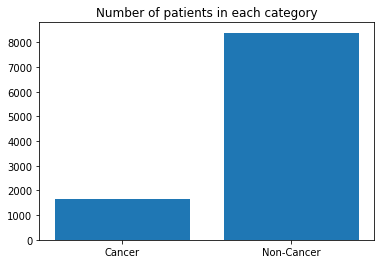

In [24]:
plt.bar([1,2], [1637,8388])
plt.xticks([1,2], ["Cancer","Non-Cancer"])
plt.title("Number of patients in each category")

## Numerical analysis

The mean age for patients with cancerous conditions is 62.65 years with a standard deviation of 15 years, and the mean age of patients with non-cancerous conditions is 49.77 years with a standard deviation of 16.53 years. The distributions can be seen below:

### Cancerous

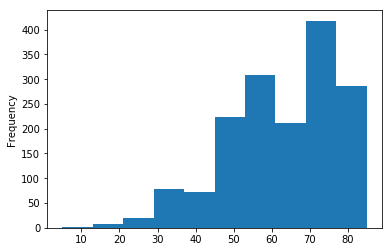

In [8]:
cancer['age'].plot(kind='hist')
plt.show()

As you can see, the data is not normally distributed, with more data concentrated to the right side of the graph. This does not pose an issue to the our frequentist approach, however, because the central limit therorem does not rely on the data being normal. As our data is very large (1627 data points), independent (since none of the samples depend on each other), and presumably random, we can still proceed with our approach.

In [9]:
c_mean = cancer['age'].mean()
c_mean

62.62461538461538

In [10]:
c_std = cancer['age'].std()
c_std

14.993451267198582

### Noncancerous

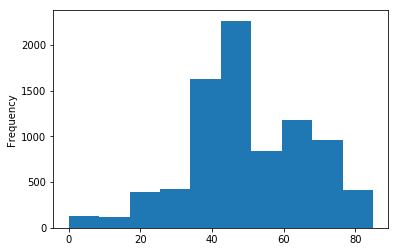

In [11]:
noncancer['age'].plot(kind='hist')
plt.show()

As you can see, the age for the noncancerous data is significantly more normal compared to that of the cancerous data. The central limit therorem still holds: We have a large amount of data (8388 data points), our samples are independent, and presumably random.

In [12]:
nc_mean = noncancer['age'].mean()
nc_mean

49.765390615624625

In [13]:
nc_std = noncancer['age'].std()
nc_std

16.531354643472064

## Testing

I chose the t-test because the true mean and standard deviations of the populations (cancerous and non-cancerous) are not known. With an alpha of 0.05 and the values as listed above, I calculated a t-statistic of 31.11. The p-value is very small, and definitely below our alpha, so we accept the alternative hypothesis: that the age for patients with cancerous conditions are higher than those of patients with non-cancerous conditions. 

In [14]:
H0 = "The mean age for patients with cancerous conditions is less than or equal to patients with noncancerous conditions."
H1 = "The mean age for patients with cancerous conditions is greater than that of patients with noncancerous conditions."
alpha = 0.05

diff = c_mean - nc_mean
comb_var = c_std ** 2 / 1627 + nc_std ** 2 / 8388
se = np.sqrt(comb_var)

t_score = (diff - 0) / se
t_score

31.11952449474773

In [15]:
df = 1637 + 8388 - 2
p = 1 - stats.t.cdf(t_score, df=df)
p

0.0

In [16]:
if p < 0.05:
    print(H1)
else:
    print(H0)

The mean age for patients with cancerous conditions is greater than that of patients with noncancerous conditions.


This conclusion would suggest that age could play a role in whether a diagnosis is cancerous or not, and that it might be helpful to include this data in the final classification system. For example, it is possible that given two similar images, the one with a higher patient age is cancerous and the one with a lower patient age is noncancerous. Thus, we should include this data, as it is useful for diagnosis.
